<a href="https://colab.research.google.com/github/PratyushaChatterjee/ML-works/blob/main/MNIST_dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10
1500/1500 [==============================] - 103s 67ms/step - loss: 0.1353 - accuracy: 0.9569 - val_loss: 0.0433 - val_accuracy: 0.9868
Epoch 2/10
1500/1500 [==============================] - 92s 61ms/step - loss: 0.0419 - accuracy: 0.9869 - val_loss: 0.0354 - val_accuracy: 0.9909
Epoch 3/10
1500/1500 [==============================] - 87s 58ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.0389 - val_accuracy: 0.9885
Epoch 4/10
1500/1500 [==============================] - 90s 60ms/step - loss: 0.0223 - accuracy: 0.9926 - val_loss: 0.0429 - val_accuracy: 0.9883
Epoch 5/10
1500/1500 [==============================] - 90s 60ms/step - loss: 0.0169 - accuracy: 0.9947 - val_loss: 0.0351 - val_accuracy: 0.9912
Epoch 6/10
1500/1500 [==============================] - 91s 60ms/step - loss: 0.0140 - accuracy: 0.9950 - val_loss: 0.0387 - val_accuracy: 0.9889
Epoch 7/10
1500/1500 [==============================] - 91s 60ms/step - loss: 0.0122 - accuracy: 0.9963 - val_loss: 0.0377 

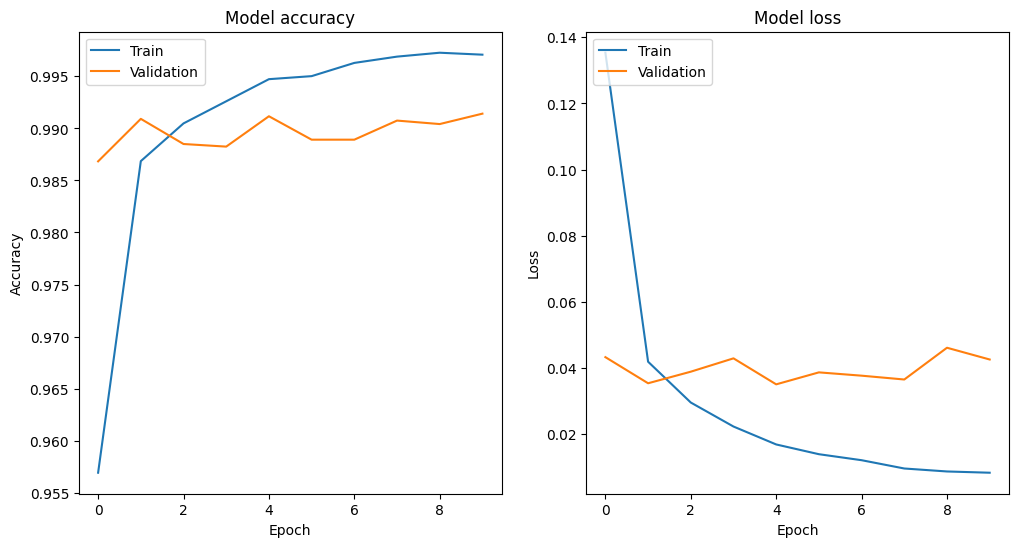

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Custom activation function: ReLU with a slight modification
def custom_activation(x):
    return tf.nn.relu(x) + 0.01 * x  # Adding a small coefficient for slight modification

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to (batch_size, height, width, channels) for CNN
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Split the data into training and validation sets (80-20 split)
split = int(0.8 * len(x_train))
x_val, y_val = x_train[split:], y_train[split:]
x_train, y_train = x_train[:split], y_train[:split]

# Define the model with striding, padding, and custom activation function
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation=custom_activation, input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation=custom_activation))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation=custom_activation))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation=custom_activation))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
